In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import functions as f
import json
import sys, importlib

In [15]:
df = pd.read_csv("../../../../data/CoMix_UK/merged_df_filter.csv")
print(df.columns, len(df))
df_1 = df[(df['sday_id'] >= "2020-07-30") & (df['sday_id'] < "2020-09-03")]
df_2 = df[(df['sday_id'] >= "2020-09-03") & (df['sday_id'] <= "2020-10-26")]
contacts1 = f.dataframe_to_contacts_vec(df_1)
contacts2 = f.dataframe_to_contacts_vec(df_2)
with open('../model_output_files/network_multi_1.json', 'r') as file:
    network_multi_1 = json.load(file)
with open('../model_output_files/network_multi_2.json', 'r') as file:
    network_multi_2 = json.load(file)
with open('../model_output_files/network_sbm_1.json', 'r') as file:
    network_sbm_1 = json.load(file)
with open('../model_output_files/network_sbm_2.json', 'r') as file:
    network_sbm_2 = json.load(file)
# after updates 
with open('../networks/network_model1.json', 'r') as file:
    network_multi_1_fix = json.load(file)
with open('../networks/network_model2.json', 'r') as file:
    network_multi_2_fix = json.load(file)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'part_id', 'hh_id', 'part_age',
       'part_gender', 'cont_id', 'cnt_age_exact', 'cnt_age_est_min',
       'cnt_age_est_max', 'cnt_gender', 'frequency_multi', 'phys_contact',
       'cnt_home', 'cnt_work', 'cnt_school', 'cnt_transport', 'cnt_leisure',
       'cnt_otherplace', 'duration_multi', 'X_x', 'sday_id', 'dayofweek',
       'day', 'month', 'year', 'wave', 'X_y', 'country', 'hh_size',
       'part_average_age', 'cnt_average_age', 'part_rand_age', 'cnt_rand_age'],
      dtype='object') 231497


## Log binning CoMix vs network model

In [106]:
A = 1.5
importlib.reload(sys.modules['functions'])
comix_x1, comix_y1 = f.log_bins(contacts=contacts1, A=A)
comix_x1[0] = 1/A
degrees_multi1 = np.array(network_multi_1['degree'])
model_x1, model_y1 = f.log_bins(contacts=degrees_multi1, A=A)
model_x1[0] = 1/A
degrees_sbm1 = np.array(network_sbm_1['degree'])
sbm_x1, sbm_y1 = f.log_bins(contacts=degrees_sbm1, A=A)
sbm_x1[0] = 1/A

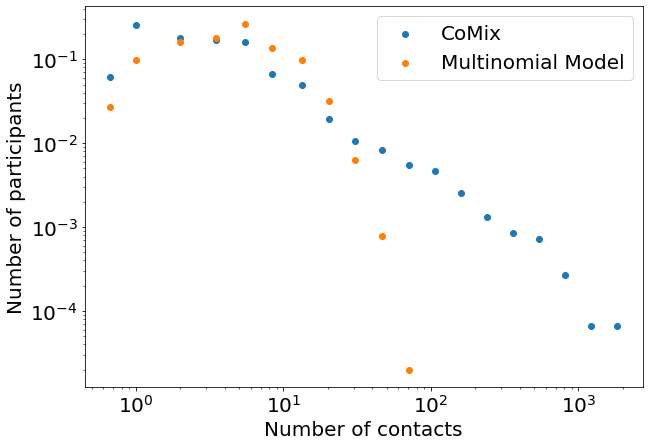

In [107]:
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(comix_x1,comix_y1, label = "CoMix")
ax.scatter(model_x1, model_y1, label = "Multinomial Model")
# ax.scatter(sbm_x, sbm_y, label = "SBM")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Number of participants")
ax.set_xlabel("Number of contacts")
ax.legend()
plt.show()

In [108]:
A = 1.5
importlib.reload(sys.modules['functions'])
comix_x2, comix_y2 = f.log_bins(contacts=contacts2, A=A)
comix_x2[0] = 1/A
degrees_multi2 = np.array(network_multi_2['degree'])
model_x2, model_y2 = f.log_bins(contacts=degrees_multi2, A=A)
model_x2[0] = 1/A
degrees_sbm2 = np.array(network_sbm_2['degree'])
sbm_x2, sbm_y2 = f.log_bins(contacts=degrees_sbm2, A=A)
sbm_x2[0] = 1/A

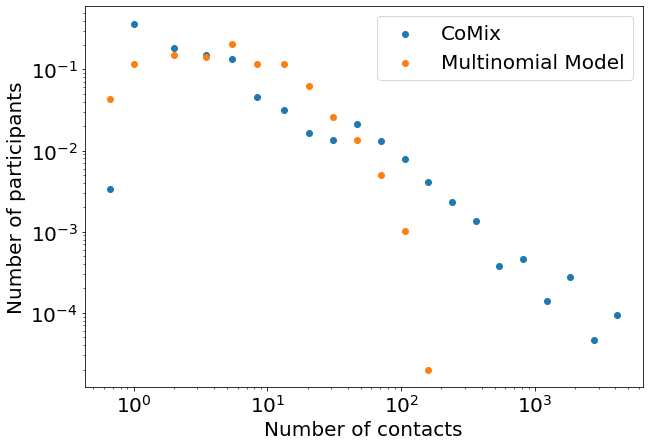

In [109]:
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(comix_x2,comix_y2, label = "CoMix")
ax.scatter(model_x2, model_y2, label = "Multinomial Model")
# ax.scatter(sbm_x, sbm_y, label = "SBM")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Number of participants")
ax.set_xlabel("Number of contacts")
ax.legend()
plt.show()

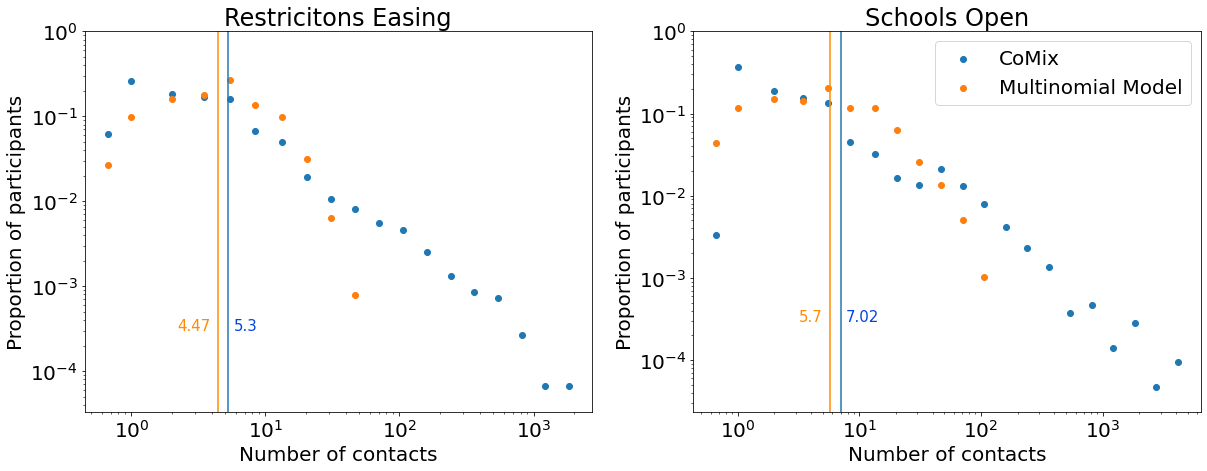

In [110]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].scatter(comix_x1,comix_y1, label = "CoMix")
ax[0].scatter(model_x1, model_y1, label = "Multinomial Model")
ax[0].vlines(np.mean(contacts1), min(comix_y1)/2, 1)
ax[0].vlines(np.mean(degrees_multi1),min(comix_y1)/2, 1, colors=['darkorange'])
ax[0].text(5.8,3e-4,f'{round(np.mean(contacts1),2)}', fontdict={'fontsize': 15, 'color': 'xkcd:blue', 'alpha': 1})
ax[0].text(2.2,3e-4,f"{round(np.mean(degrees_multi1),2)}", fontdict={'fontsize': 15, 'color': 'darkorange', 'alpha': 1})
# ax[0].scatter(sbm_x, sbm_y, label = "SBM")
ax[0].set_ylim(min(comix_y1)/2,1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel("Proportion of participants")
ax[0].set_xlabel("Number of contacts")
ax[0].set_title("Restricitons Easing")

ax[1].scatter(comix_x2,comix_y2, label = "CoMix")
ax[1].scatter(model_x2, model_y2, label = "Multinomial Model")
ax[1].vlines(np.mean(contacts2), min(comix_y2)/2, 1)
ax[1].vlines(np.mean(degrees_multi2),min(comix_y2)/2, 1, colors=['darkorange'])
ax[1].text(7.7,3e-4,f'{round(np.mean(contacts2),2)}', fontdict={'fontsize': 15, 'color': 'xkcd:blue', 'alpha': 1})
ax[1].text(3.2,3e-4,f"{round(np.mean(degrees_multi2),2)}", fontdict={'fontsize': 15, 'color': 'darkorange', 'alpha': 1})
# ax[0].scatter(sbm_x, sbm_y, label = "SBM")
ax[1].set_ylim(min(comix_y2)/2,1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylabel("Proportion of participants")
ax[1].set_xlabel("Number of contacts")
ax[1].legend()
ax[1].set_title("Schools Open")

# plt.savefig("../../../../figures/important/3. stubbing/model3_vs_comix.png", bbox_inches="tight")
plt.show()

### After the fix

In [112]:
means = np.zeros((3,2))
means[0, 0] = np.abs(np.mean(contacts1) - np.mean(degrees_sbm1))
means[0, 1] = np.abs(np.mean(contacts2) - np.mean(degrees_sbm2))
means[1, 0] = np.abs(np.mean(contacts1) - np.mean(degrees_multi1))
means[1, 1] = np.abs(np.mean(contacts2) - np.mean(degrees_multi2))

degrees_multi1_fix = np.array(network_multi_1_fix['degree'])
model_x1_f, model_y1_f = f.log_bins(contacts=degrees_multi1_fix, A=A)
model_x1_f[0] = 1/A

degrees_multi2_fix = np.array(network_multi_2_fix['degree'])
model_x2_f, model_y2_f = f.log_bins(contacts=degrees_multi2_fix, A=A)
model_x2_f[0] = 1/A

means[2,0] = np.abs(np.mean(contacts1) - np.mean(degrees_multi1_fix))
means[2,1] = np.abs(np.mean(contacts2) - np.mean(degrees_multi2_fix))

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [116]:
means

array([[0.83498196, 0.62550066],
       [0.83418196, 1.32478066],
       [0.26036196, 0.72336066]])

In [51]:
errors = np.zeros((3, max(len(comix_x1),len(comix_x2))))
errors[0] = np.pad(np.abs(comix_y1 - np.pad(sbm_y1, (0, len(comix_x1) - len(sbm_y1)))), (0, 2), 'constant') + np.abs(comix_y2 - np.pad(sbm_y2, (0, len(comix_x2) - len(sbm_y2))))
errors[1] = np.pad(np.abs(comix_y1 - np.pad(model_y1, (0, len(comix_x1) - len(model_y1)))), (0, 2), 'constant') + np.abs(comix_y2 - np.pad(model_y2, (0, len(comix_x2) - len(model_y2))))
errors[2] = np.pad(np.abs(comix_y1 - np.pad(model_y1_f, (0, len(comix_x1) - len(model_y1_f)))), (0, 2), 'constant') + np.abs(comix_y2 - np.pad(model_y2_f, (0, len(comix_x2) - len(model_y2_f))))


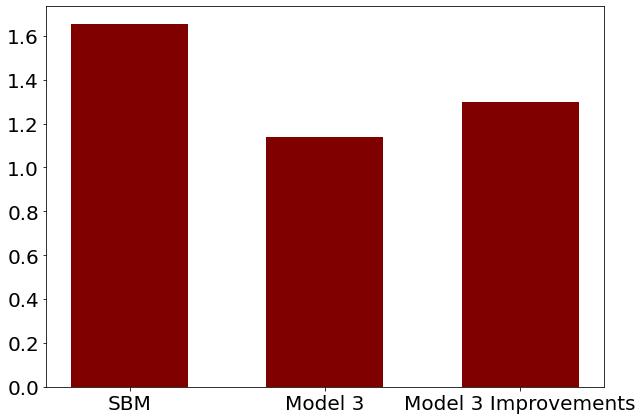

In [60]:
data = {'SBM': sum(errors[0]), 'Model 3': sum(errors[1]), 'Model 3 Improvements': sum(errors[2])}
x = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 7))
 
# creating the bar plot
plt.bar(x, values, color ='maroon',
        width = 0.6)
plt.show()

In [105]:
means

array([[0.83498196, 0.62550066],
       [0.26036196, 0.72336066],
       [0.26036196, 0.72336066]])

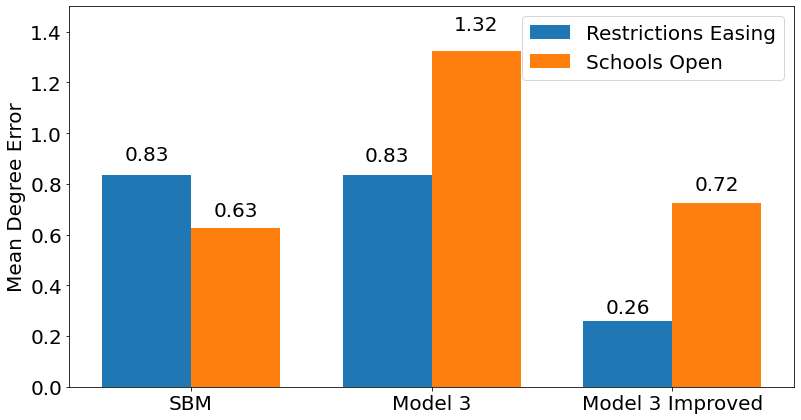

In [139]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.37       # the width of the bars

fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)

# yvals = [4, 9, 2]
rects1 = ax.bar(ind, means[:,0], width)
# zvals = [1,2,3]
rects2 = ax.bar(ind+width, means[:,1], width)
# kvals = [11,12,13]
# rects3 = ax.bar(ind+width*2, means[:,2], width, color='b')

ax.set_ylabel('Mean Degree Error')
ax.set_xticks(ind+width/2)
ax.set_xticklabels( ('SBM', 'Model 3', 'Model 3 Improved') )
ax.legend( (rects1[0], rects2[0]), ('Restrictions Easing','Schools Open') )
ax.set_ylim([0,1.5])

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, f'{np.round(h,2)}',
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.savefig('../../../../Presentation/error_degree.png', bbox_inches='tight')
plt.show()

## Contact Matrix

In [143]:
network_multi_1_fix['adjacency_matrix'][0][0]

{'i': 0, 'j': 388, 'weight': 1}

In [157]:
n = 100_000
partitions = [58*n/1000, 145*n/1000, 212*n/1000, 364*n/1000, 497*n/1000, 623*n/1000, 759*n/1000, 866*n/1000, n]
groups = [a if i == 0 else a - partitions[i-1] for i,a in enumerate(partitions)]
matrix1 = np.zeros((9,9))
matrix2 = np.zeros((9,9))

for i, x in enumerate(network_multi_1_fix['adjacency_matrix']):
    part_i = network_multi_1_fix['age_brackets'][i]
    if i % 10_000 == 0:
        print(i)
    for y in x:
        j = y['j']
        part_j = network_multi_1_fix['age_brackets'][j]
        matrix1[part_i, part_j] += y['weight']
for i in range(len(matrix1)):
    matrix1[i] = matrix1[i] / groups[i]

for i, x in enumerate(network_multi_2_fix['adjacency_matrix']):
    part_i = network_multi_2_fix['age_brackets'][i]
    if i % 10_000 == 0:
        print(i)
    for y in x:
        j = y['j']
        part_j = network_multi_2_fix['age_brackets'][j]
        matrix2[part_i, part_j] += y['weight']
for i in range(len(matrix2)):
    matrix2[i] = matrix2[i] / groups[i]

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000


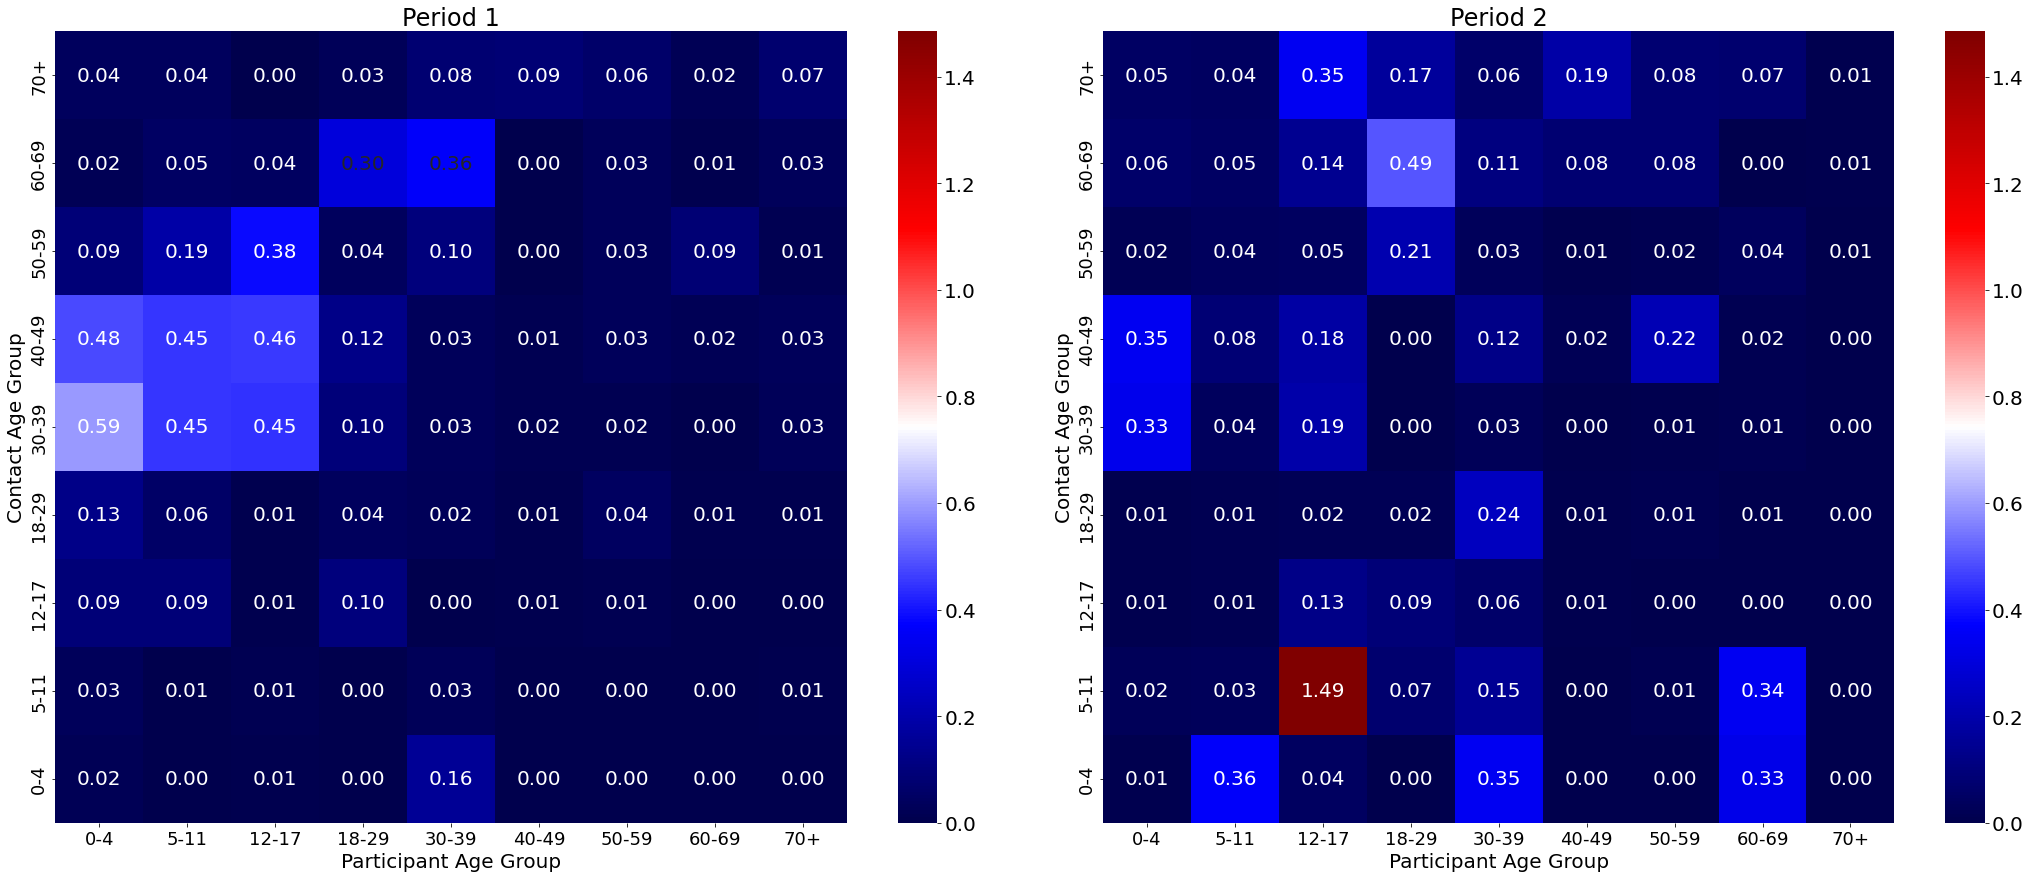

In [174]:
comix1 = np.genfromtxt('../model_input_files/fixed_rates_mat1.csv',delimiter=',')
comix2 = np.genfromtxt('../model_input_files/fixed_rates_mat2.csv',delimiter=',')
importlib.reload(sys.modules['functions'])
buckets = [5,12,18,30,40,50,60,70]
f.plot_age_mat2((np.abs(comix1 - matrix1)).transpose(), (np.abs(comix2 - matrix2)).transpose(), buckets)

## Where are we missing stubs

In [2]:
missing2 = np.genfromtxt("../model_output_files/unconnected_stub_breakdown2.csv", delimiter=",")
missing2 = missing2/100
missing1 = np.genfromtxt("../model_output_files/unconnected_stub_breakdown1.csv", delimiter=",")
missing1 = missing1/100

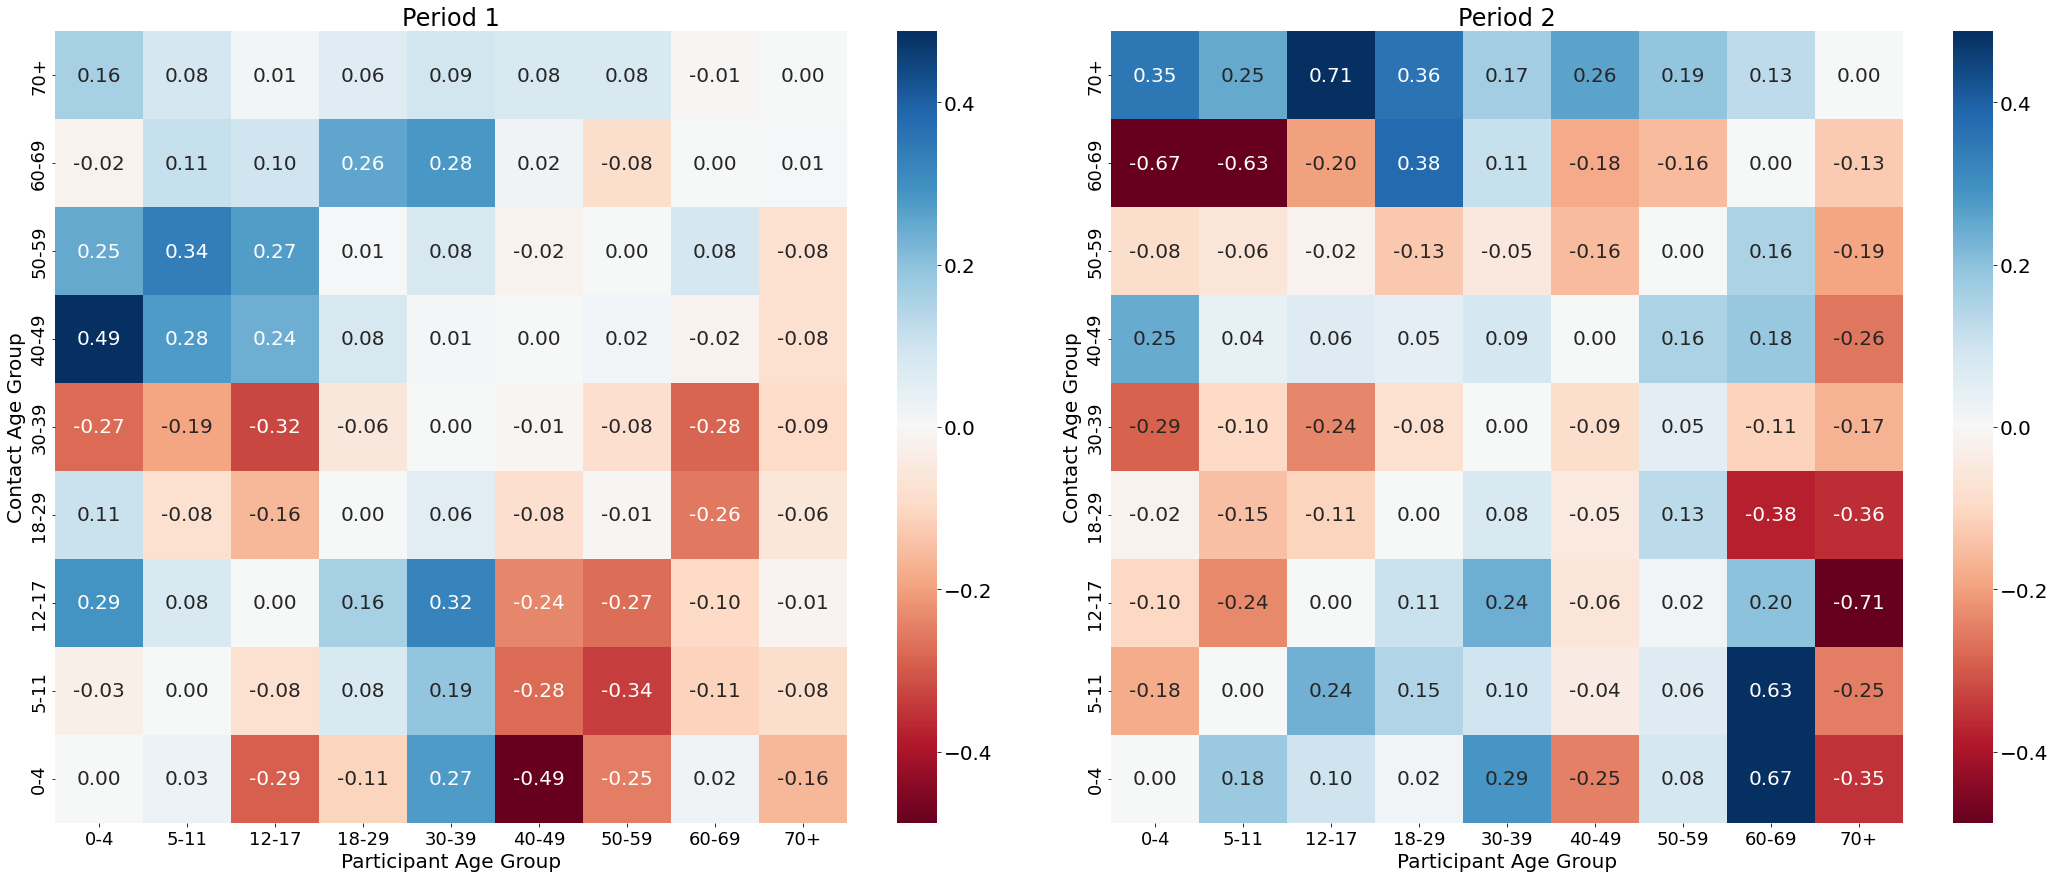

In [3]:
importlib.reload(sys.modules['functions'])
buckets = [5,12,18,30,40,50,60,70]
f.plot_age_mat2(missing1.transpose(), missing2.transpose(), buckets)